In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [22]:
transactionDF = pd.read_csv('ENAK.JK.csv')
display(transactionDF.head(3))
print(transactionDF.shape)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/8/22,895,895,795,825,825,50305400
1,2/9/22,825,825,770,815,815,11716500
2,2/10/22,815,835,815,825,825,6150100


(191, 7)


In [23]:
# conver date to datetime
transactionDF['Date'] = pd.to_datetime(transactionDF['Date'])
transactionDF['Price Change'] = transactionDF['Close'] / transactionDF['Open'] - 1
transactionDF['Volume Change'] = transactionDF['Volume'] / transactionDF['Volume'].shift(1) - 1
display(transactionDF.head(3))

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Volume Change
0,2022-02-08,895,895,795,825,825,50305400,-0.078212,NaN
1,2022-02-09,825,825,770,815,815,11716500,-0.012121,-0.767093
2,2022-02-10,815,835,815,825,825,6150100,0.012270,-0.475091


In [88]:
# get price mean, std
priceMean = transactionDF['Price Change'].mean()
priceStd = transactionDF['Price Change'].std()

# get volume mean, std
volumeMean = transactionDF['Volume'].mean()
volumeStd = transactionDF['Volume'].std()

# generate normal distribution
priceDist = stats.norm.rvs(priceMean, priceStd, 200)
volumeDist = stats.lognorm.rvs(1,loc=volumeMean, scale=volumeStd, size=200)

In [113]:
# plot the closing price
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(transactionDF['Price Change'], kde=False, color='blue', ax=ax[0], bins=30)
sns.distplot(priceDist, kde=False, color='red', ax=ax[0], bins=30)
plt.legend(['Price Change', 'Normal Distribution'])

# plot the volume
sns.distplot(transactionDF['Volume'], kde=False, color='blue', ax=ax[1], bins=50)
sns.distplot(volumeDist, kde=False, color='red', ax=ax[1], bins=50)
plt.legend(['Volume Change', 'Log Normal Distribution'])
plt.clf()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

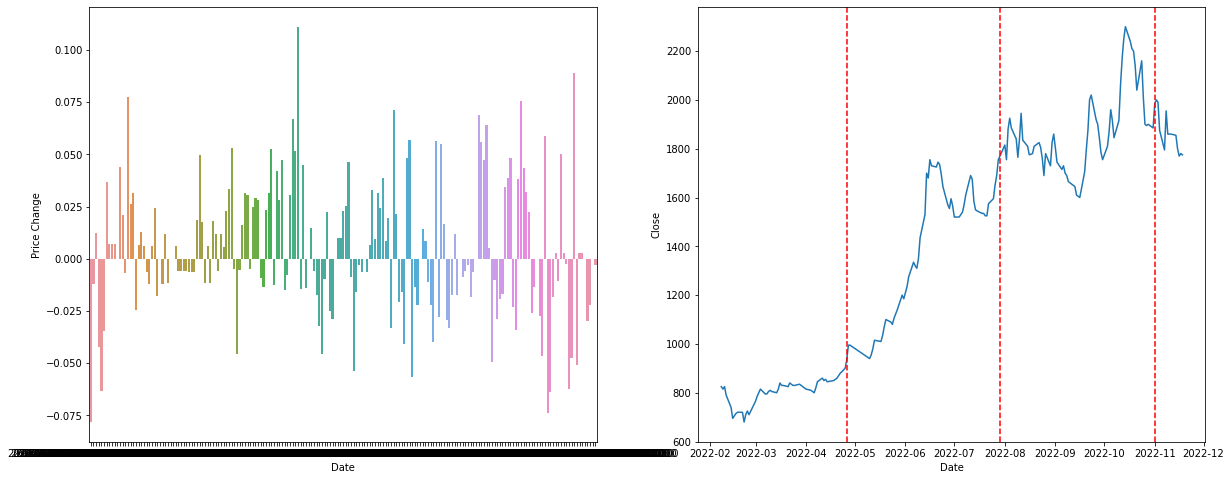

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Date', y='Price Change', data=transactionDF, ax=ax[0])
sns.lineplot(x='Date', y='Close', data=transactionDF, ax=ax[1])
q1_2022 = pd.to_datetime('2022-04-26')
q2_2022 = pd.to_datetime('2022-07-29')
q3_2022 = pd.to_datetime('2022-11-01')

ax[1].axvline(x=q1_2022, color='red', linestyle='--')
ax[1].axvline(x=q2_2022, color='red', linestyle='--')
ax[1].axvline(x=q3_2022, color='red', linestyle='--')

### Standard Deviation after earning call 

Is there a seasonality or effect regarding earning call in term of standard deviation as the quantitative metric ?

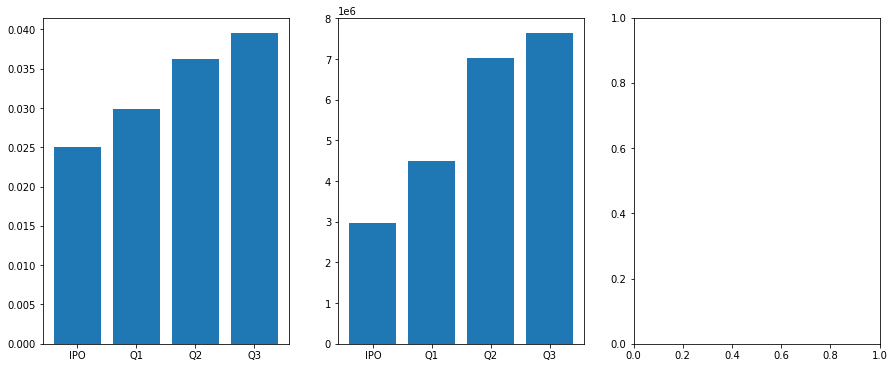

In [118]:
ipo = transactionDF[transactionDF['Date'] < q1_2022]
Q1 = transactionDF[(transactionDF['Date'] >= q1_2022) & (transactionDF['Date'] <= q2_2022)]
Q2 = transactionDF[(transactionDF['Date'] >= q2_2022) & (transactionDF['Date'] <= q3_2022)]
Q3 = transactionDF[(transactionDF['Date'] >= q3_2022)]

stdReport = pd.DataFrame({'IPO': [ipo['Price Change'].std()], 'Q1': [Q1['Price Change'].std()], 'Q2': [Q2['Price Change'].std()], 'Q3': [Q3['Price Change'].std()]})
volReport = pd.DataFrame({'IPO': [ipo['Volume'].mean()], 'Q1': [Q1['Volume'].mean()], 'Q2': [Q2['Volume'].mean()], 'Q3': [Q3['Volume'].mean()]})

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].bar(stdReport.columns, stdReport.iloc[0])
ax[1].bar(volReport.columns, volReport.iloc[0])


plt.show()